<a href="https://colab.research.google.com/github/cristian160705/DataCience_Pandas/blob/main/Inmuebles_cdmx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inmuebles de la ciudad de mexico

###Importaciones

In [ ]:
import pandas as pd

###Importacion y lectura de la base de datos csv.
Importamos con la metodo de pandas read_csv los datos y utilizamos sep ";" para que se separen y queden en formato tabla.

In [ ]:
url= "https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv"
df = pd.read_csv(url, sep=";")
df.head()

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN


###Analisis exploratorio de los datos


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
count,25121.000000,25121.000000,25121.000000,25121.000000,2.510700e+04,2.249500e+04,1.803700e+04
mean,1.748856,1.798655,0.656781,220.885076,3.688505e+04,9.528676e+03,4.436513e+03
std,1.811131,22.906129,1.083180,817.465428,3.669381e+05,1.547102e+05,2.283381e+04
min,0.000000,0.000000,0.000000,0.000000,3.150000e+02,3.500000e+00,3.500000e+00
25%,0.000000,0.000000,0.000000,55.000000,5.600000e+03,2.275000e+03,4.270000e+02
50%,2.000000,1.000000,0.000000,90.000000,1.137500e+04,4.056500e+03,1.008000e+03
75%,3.000000,2.000000,1.000000,180.000000,2.695000e+04,7.350000e+03,2.625000e+03
max,100.000000,1966.000000,24.000000,42000.000000,5.250000e+07,2.293400e+07,1.577188e+06


#**Demandas de Machine learning**

**¿Cuáles son los valores promedio de alquiler por tipo de propiedad?**

In [ ]:
df_tipo_precio = df.groupby("Tipo")["Valor"].mean().sort_values(ascending=True)

<Axes: xlabel='Precio', ylabel='Tipo'>

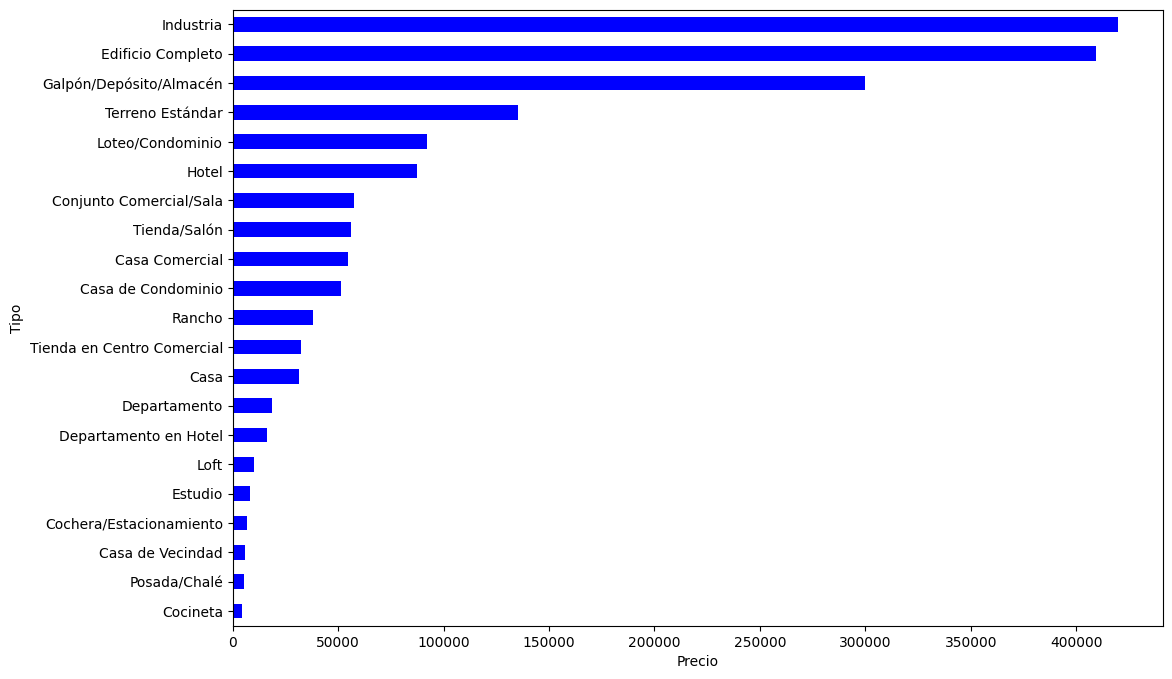

In [ ]:
df_tipo_precio.plot(kind="barh",figsize=(12,8),color="blue", ylabel="Tipo",xlabel="Precio" )

In [ ]:
df.Tipo.unique()

array(['Cocineta', 'Casa', 'Conjunto Comercial/Sala', 'Departamento',
       'Casa de Condominio', 'Edificio Completo', 'Departamento en Hotel',
       'Tienda/Salón', 'Casa Comercial', 'Casa de Vecindad',
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft',
       'Galpón/Depósito/Almacén', 'Tienda en Centro Comercial', 'Rancho',
       'Posada/Chalé', 'Estudio', 'Hotel', 'Loteo/Condominio',
       'Industria'], dtype=object)

In [ ]:
edificios_comerciales = ['Cocineta', 'Casa',
       'Casa de Condominio','Departamento en Hotel',
       'Casa de Vecindad', "Departamento",
       'Terreno Estándar', 'Cochera/Estacionamiento', 'Loft','Rancho']
df_no_comerciales=df.query("@edificios_comerciales in Tipo")

**¿Cuál es el porcentaje de cada tipo de propiedad en nuestra base de datos?**

<Axes: xlabel='Tipo', ylabel='Porcentaje'>

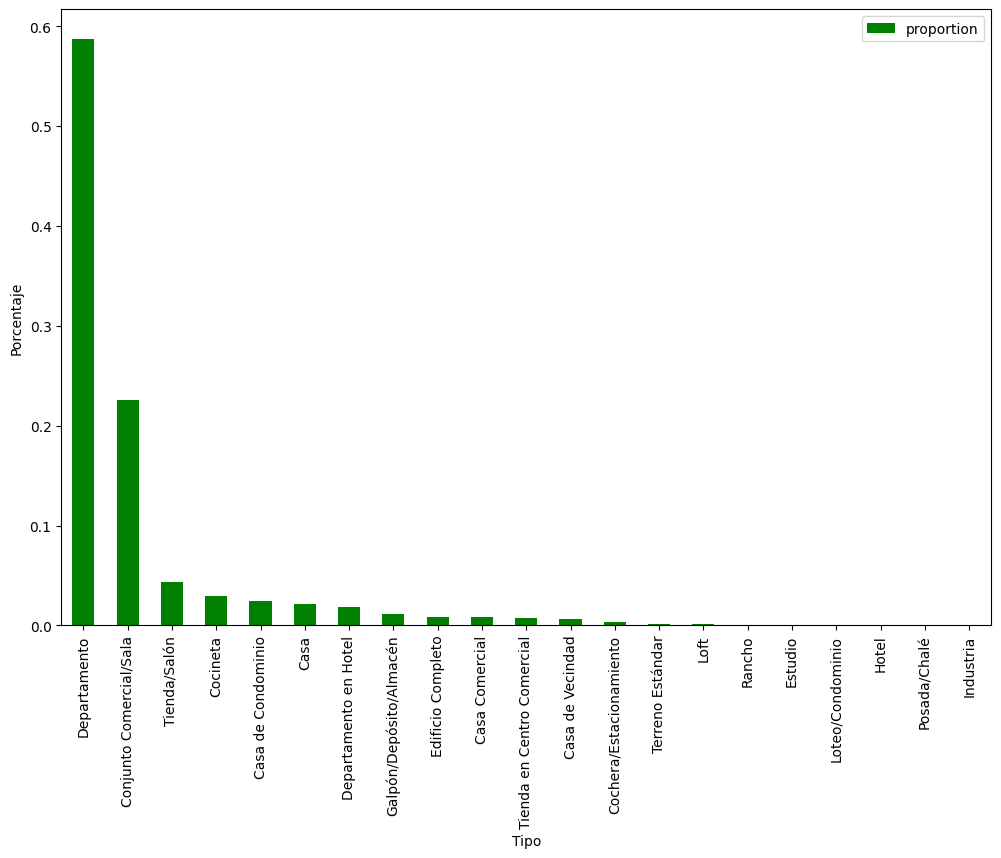

In [ ]:
porcentaje_tipo= df.Tipo.value_counts(normalize=True).to_frame()
porcentaje_tipo.plot(kind="bar", figsize=(12,8), color="green", xlabel="Tipo" , ylabel="Porcentaje"  )

In [ ]:
df_departamentos=df.query("Tipo == 'Departamento'")
df_departamentos.head(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
7,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
8,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
10,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
13,Departamento,Santa Fe,2,1,1,67,5950.0,2061.5,514.5
14,Departamento,Narvarte,2,1,0,110,6650.0,2450.0,483.0
16,Departamento,Narvarte,2,1,0,78,7000.0,2450.0,NaN
18,Departamento,Coyoacán,3,1,1,125,24500.0,7350.0,1620.5
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5


##Tratando con datos nulos.


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25121 entries, 0 to 25120
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          25121 non-null  object 
 1   Colonia       25121 non-null  object 
 2   Habitaciones  25121 non-null  int64  
 3   Garages       25121 non-null  int64  
 4   Suites        25121 non-null  int64  
 5   Area          25121 non-null  int64  
 6   Valor         25107 non-null  float64
 7   Condominio    22495 non-null  float64
 8   Impuesto      18037 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


,0
Tipo,0
Colonia,0
Habitaciones,0
Garages,0
Suites,0
Area,0
Valor,14
Condominio,2626
Impuesto,7084


In [ ]:
df_sin_null = df.fillna(0)
df_sin_null

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,0.0,0.0
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,0.0
...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,0.0,0.0
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,0.0


##Tratando registros incosistentes

Algunos registros en la base de datos no tienen mucho sentido, por ejemplo:

Departamentos con un valor de alquiler igual a 0.

Departamentos con un valor de condominio igual a 0.

In [ ]:
df_a_remover = df.query("Valor==0 | Condominio==0").index
df.drop(df_a_remover , axis= 0 , inplace= True)
df


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN


##Filtros


En este momento, el equipo de ML desea evaluar solo propiedades en escenarios específicos, como:

- Apartamentos que tienen 1 dormitorio y un alquiler menor a MXN 4200.

- Apartamentos que tienen al menos 2 dormitorios, un alquiler menor a MXN 10500 y una superficie mayor a 70 m².

In [ ]:
df_departamentos_filtered = df[df["Tipo"] == "Departamento"]
seleccion_1 = df_departamentos_filtered["Habitaciones"] == 1
seleccion_2 = df_departamentos_filtered["Valor"] < 4200
filtro_1 = (seleccion_1) & (seleccion_2)
df_filtered_1 = df_departamentos_filtered[filtro_1]
df_filtered_1

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
19,Departamento,Narvarte,1,0,0,48,2625.0,2702.0,87.5
37,Departamento,Centro Histórico,1,0,0,27,2625.0,1298.5,66.5
61,Departamento,Centro Histórico,1,1,0,37,3850.0,1890.0,3150.0
...,...,...,...,...,...,...,...,...,...
24872,Departamento,Peralvillo,1,0,1,69,3150.0,2240.0,441.0
24880,Departamento,La Condesa,1,0,0,46,3850.0,1585.5,112.0
24892,Departamento,Loma Bonita,1,0,0,40,1925.0,NaN,NaN
24943,Departamento,Roma,1,0,0,21,3500.0,987.0,87.5


In [ ]:
seleccion_3 = df_departamentos_filtered["Habitaciones"] >= 2
seleccion_4 = df_departamentos_filtered["Valor"] < 10500
seleccion_5 = df_departamentos_filtered["Area"] > 70

filtro_2 = (seleccion_3) & (seleccion_4) & (seleccion_5)
df_filtered_2 = df_departamentos_filtered[filtro_2]
df_filtered_2.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
7618,Departamento,Santa Fe,2,1,1,72,5250.0,2625.0,1925.0
15881,Departamento,Ciudad de los Deportes,2,1,0,80,3500.0,1365.0,70.0
10581,Departamento,Condesa,2,1,1,105,9800.0,2572.5,NaN
1844,Departamento,Narvarte,2,1,1,92,10150.0,3174.5,NaN
10757,Departamento,Juárez,3,0,1,97,9800.0,2492.0,556.5
3340,Departamento,Peralvillo,3,1,1,73,5600.0,2625.0,NaN
7004,Departamento,Santa Fe,2,1,1,84,8750.0,7297.5,927.5
12343,Departamento,Narvarte,4,2,1,188,7000.0,7000.0,1081.5
12671,Departamento,Narvarte,2,0,1,84,7350.0,4025.0,1428.0
10665,Departamento,Tepalcatlalpan,2,0,0,73,3150.0,NaN,NaN


In [ ]:
filtro_3 = (df_departamentos_filtered["Area"] > 70) & (df_departamentos_filtered["Valor"] < 10500) & (df_departamentos_filtered["Habitaciones"] >= 2)
df_filtered_3 = df_departamentos_filtered[filtro_3]
df_filtered_3.sample(10)

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
20186,Departamento,San Ángel,2,1,0,86,10465.0,1813.0,843.5
14053,Departamento,Narvarte,4,2,2,182,8750.0,5670.0,1039.5
20602,Departamento,Santa Fe,3,1,1,131,9800.0,4900.0,14052.5
21823,Departamento,Condesa,3,0,1,90,8750.0,4900.0,759.5
16255,Departamento,Roma,2,1,1,92,7700.0,5005.0,826.0
1278,Departamento,Napoles,2,0,0,75,8750.0,2660.0,619.5
2806,Departamento,Santa Fe,3,2,3,100,6650.0,5243.0,444.5
22315,Departamento,Santa Fe,2,1,1,78,5950.0,3150.0,455.0
22896,Departamento,Santa Fe,2,2,0,78,8750.0,2450.0,525.0
21586,Departamento,Narvarte,3,1,0,110,6650.0,1795.5,504.0


##Guardado de archivos


Para finalizar, necesitamos almacenar nuestros dataframes en formato csv, tras realizar todos los análisis y tratamientos. [Documentacion de Pandas](https://pandas.pydata.org/docs/user_guide/io.html#io-tools-text-csv-hdf5)

In [ ]:
df_departamentos_filtered.to_csv("alquiler_procesado.csv", index=False, sep=";")
pd.read_csv("alquiler_procesado.csv" , sep=";")

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto
0,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0
1,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN
2,Departamento,Centro Histórico,1,0,0,36,4200.0,NaN,NaN
3,Departamento,Condesa,1,0,1,40,7000.0,1963.5,175.0
4,Departamento,Condesa,4,3,1,243,45500.0,7000.0,2810.5
...,...,...,...,...,...,...,...,...,...
14759,Departamento,Lomas de Chapultepec,3,0,1,80,10500.0,3535.0,871.5
14760,Departamento,Coyoacán,3,1,2,150,52500.0,4900.0,2100.0
14761,Departamento,Narvarte,1,0,0,28,3500.0,1260.0,87.5
14762,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5


##Creacion de columnas


- valor_mensual: Esta columna debe contener los gastos mensuales de cada propiedad, incluyendo el alquiler y el condominio.

- valor_anual: Esta columna debe contener los gastos anuales por propiedad, es decir, el Impuesto más 12 meses de alquiler y condominio.

In [ ]:
url= "https://gist.githubusercontent.com/ahcamachod/a572cfcc2527046db93101f88011b26e/raw/ffb13f45a79d31223e645611a119397dd127ee3c/alquiler.csv"
df = pd.read_csv(url, sep=";")
df.shape

(25121, 9)

In [ ]:
df["Valor_mensual"]= df["Valor"] + df["Condominio"]
df

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0
...,...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0


In [ ]:
df["Valor_anual"] = df["Valor_mensual"] * 12 + df["Impuesto"]
df

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,48387.5
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,80307.5
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN


El equipo de desarrollo solicitó la creación de dos columnas adicionales. Sin embargo, esta vez son categóricas:

 - Descripcion: Esta columna debe contener un resumen de la información clave de las propiedades que se mostrarán en el sitio web: tipo de propiedad, barrio, cantidad de habitaciones y plazas de estacionamiento.

- Tiene_suite: Esta debe ser una columna que indique únicamente si la propiedad tiene o no suites, sin importar la cantidad.

In [ ]:
df["Descripcion"] = df["Tipo"] + " en " + df["Colonia"] + " con " + df["Habitaciones"].astype(str) + " habitaciones y " + df["Garages"].astype(str) + " plazas de estacionamiento"
df


,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en Condesa con 1 habitaciones y 0 pla...
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en Polanco con 2 habitaciones y 0 plazas ...
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en Santa Fe con 0 habi...
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en Centro Histórico con 1 habitac...
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en Del Valle con 1 habitaciones y...
...,...,...,...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN,Cochera/Estacionamiento en Centro Histórico co...
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,48387.5,Cocineta en Centro Histórico con 0 habitacione...
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,80307.5,Departamento en Mixcoac con 2 habitaciones y 1...
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN,Departamento en Lomas de Chapultepec con 2 hab...


In [ ]:
df["Tiene_suite"] = df["Suites"].apply(lambda x: True if x > 0 else False)
df

,Tipo,Colonia,Habitaciones,Garages,Suites,Area,Valor,Condominio,Impuesto,Valor_mensual,Valor_anual,Descripcion,Tiene_suite
0,Cocineta,Condesa,1,0,0,40,5950.0,1750.0,210.0,7700.0,92610.0,Cocineta en Condesa con 1 habitaciones y 0 pla...,False
1,Casa,Polanco,2,0,1,100,24500.0,NaN,NaN,NaN,NaN,Casa en Polanco con 2 habitaciones y 0 plazas ...,True
2,Conjunto Comercial/Sala,Santa Fe,0,4,0,150,18200.0,14070.0,3888.5,32270.0,391128.5,Conjunto Comercial/Sala en Santa Fe con 0 habi...,False
3,Departamento,Centro Histórico,1,0,0,15,2800.0,1365.0,70.0,4165.0,50050.0,Departamento en Centro Histórico con 1 habitac...,False
4,Departamento,Del Valle,1,0,0,48,2800.0,805.0,NaN,3605.0,NaN,Departamento en Del Valle con 1 habitaciones y...,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25116,Cochera/Estacionamiento,Centro Histórico,0,0,0,755,49000.0,NaN,NaN,NaN,NaN,Cochera/Estacionamiento en Centro Histórico co...,False
25117,Cocineta,Centro Histórico,0,0,0,27,2800.0,1225.0,87.5,4025.0,48387.5,Cocineta en Centro Histórico con 0 habitacione...,False
25118,Departamento,Mixcoac,2,1,0,48,4900.0,1781.5,129.5,6681.5,80307.5,Departamento en Mixcoac con 2 habitaciones y 1...,False
25119,Departamento,Lomas de Chapultepec,2,0,0,70,10500.0,2660.0,NaN,13160.0,NaN,Departamento en Lomas de Chapultepec con 2 hab...,False


In [ ]:
df.to_csv("Inmueble_to_developers.csv", sep=";", index=False)

#Ejercicios

##Modulo 2
Calcular el promedio de habitaciones por departamento.

Verificar cuántas colonias únicas existen en nuestra base de datos.

Analizar qué colonias tienen el promedio de alquiler más alto.

Crear un gráfico de barras horizontales que muestre las 5 colonias con los promedios de alquiler más altos.

In [ ]:
df_departamentos.groupby("Tipo")[["Tipo","Habitaciones"]].mean("Habitaciones")

,Habitaciones
Tipo,
Departamento,2.504199


In [ ]:
df["Colonia"].nunique()
df["Colonia"]

,Colonia
0,Condesa
1,Polanco
2,Santa Fe
3,Centro Histórico
4,Del Valle
...,...
25116,Centro Histórico
25117,Centro Histórico
25118,Mixcoac
25119,Lomas de Chapultepec


In [ ]:
df_promedio_alquiler_colonia = df.groupby("Colonia")[["Valor"]].mean().sort_values("Valor", ascending= False).head(8)


<Axes: xlabel='Precio', ylabel='Colonia'>

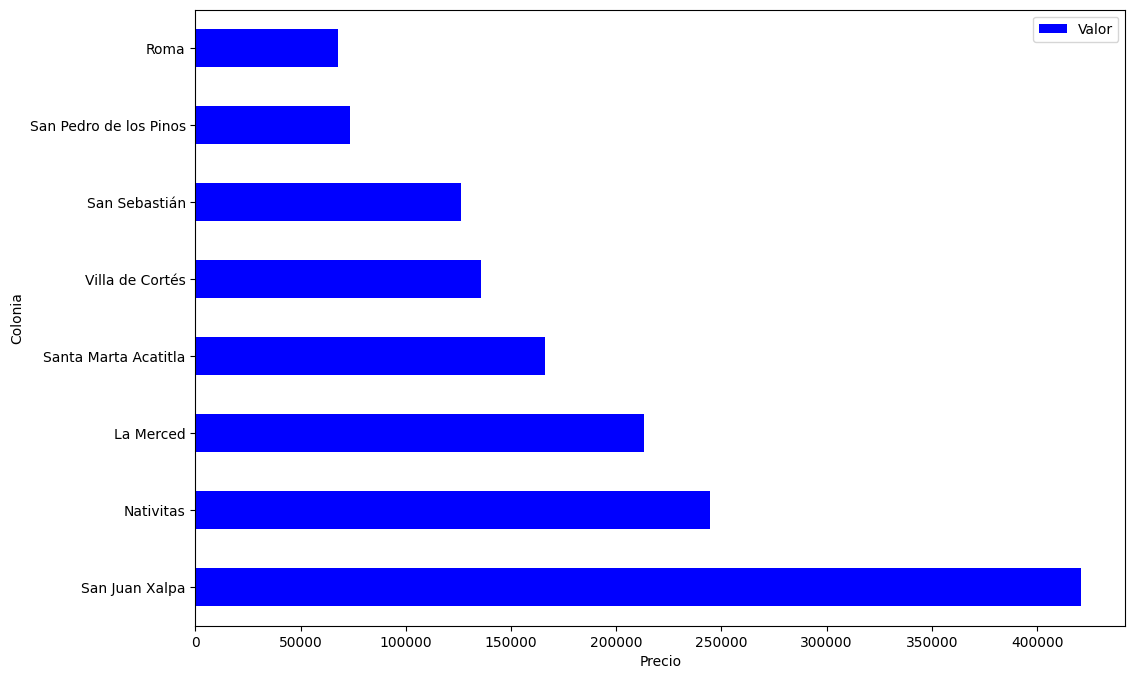

In [ ]:
df_promedio_alquiler_colonia.plot(kind="barh",figsize=(12,8),color="blue", ylabel="Colonia",xlabel="Precio")

###Modulo 3
- Verifica si la base de datos contiene datos nulos y, en caso de tenerlos, realiza el tratamiento de estos datos nulos de la manera que consideres más coherente con la situación.

- Los estudiantes "Alicia" y "Carlos" ya no forman parte del grupo. Por lo tanto, elimínalos de la base de datos.

- Aplica un filtro que seleccione solo a los estudiantes que fueron aprobados.

- Guarda el DataFrame que contiene solo a los estudiantes aprobados en un archivo CSV llamado "alumnos_aprobados.csv".

In [ ]:
url = "https://gist.githubusercontent.com/ahcamachod/807a2c1cf6c19108b2b701ea1791ab45/raw/fb84f8b2d8917a89de26679eccdbc8f9c1d2e933/alumnos.csv"
df = pd.read_csv(url, sep=",")
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,NaN,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,NaN,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,NaN,False


In [ ]:
df.isnull().sum()
df.fillna(0, inplace=True)
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,0.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,0.0,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,0.0,False


In [ ]:
estudiantes_a_remover = ["Alicia", "Carlos"]
df= df.query("@estudiantes_a_remover not in Nombre")
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,0.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,0.0,False
6,Daniela,21,7.0,True
9,Victor,28,0.0,False
10,Danilo,21,0.0,False
11,Ignacio,24,4.5,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nombre    16 non-null     object 
 1   Edad      16 non-null     int64  
 2   Nota      16 non-null     float64
 3   Aprobado  16 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 640.0+ bytes


In [ ]:
filtro_5 = (df["Aprobado"]=="True") | (df["Aprobado"]=="Verdadero")
df_aprobados = df[filtro_5]

#

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
4,Brian,21,10.0,True
6,Daniela,21,7.0,True
12,Stephany,26,10.0,True
13,Miriam,25,9.0,True
15,Milena,29,7.0,True
17,Nadia,34,8.0,Verdadero


In [ ]:
df_aprobados.to_csv( "alumnos_aprobados.csv" , sep="," , index=False)
df=pd.read_csv("alumnos_aprobados.csv" , sep=",")

In [ ]:
alumnos_aprobados = df.replace(7.0, 8.0)
alumnos_aprobados

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Brian,21,10.0,True
2,Daniela,21,8.0,True
3,Stephany,26,10.0,True
4,Miriam,25,9.0,True
5,Milena,29,8.0,True
6,Nadia,34,8.0,Verdadero


###Modulo 4

- Los estudiantes participaron en una actividad extracurricular y ganaron puntos extras. Estos puntos extras corresponden al 40% de su nota actual. Por lo tanto, crea una columna llamada "Puntos_extras" que contenga los puntos extras de cada estudiante, es decir, el 40% de su nota actual.

- Crea otra columna llamada "Notas_finales" que contenga las notas de cada estudiante sumadas con los puntos extras.

- Dado que hubo una puntuación extra, algunos estudiantes que no habían sido aprobados antes pueden haber sido aprobados ahora. En función de esto, crea una columna llamada "Aprobado_final" con los siguientes valores:

- True: si el estudiante está aprobado (la nota final debe ser mayor o igual a 7.0).
False: si el estudiante está reprobado (la nota final debe ser menor que 7.0).
Realiza una selección y verifica qué estudiantes no habían sido aprobados anteriormente, pero ahora fueron aprobados después de sumar los puntos extras.

In [ ]:
url = "https://gist.githubusercontent.com/ahcamachod/807a2c1cf6c19108b2b701ea1791ab45/raw/fb84f8b2d8917a89de26679eccdbc8f9c1d2e933/alumnos.csv"
df = pd.read_csv(url, sep=",")
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,NaN,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,NaN,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,NaN,False


In [ ]:
df.fillna(0, inplace=True)
df

,Nombre,Edad,Nota,Aprobado
0,Alberto,20,7.5,True
1,Ana,18,0.0,False
2,Camila,27,2.5,False
3,David,18,5.0,False
4,Brian,21,10.0,True
5,Bruna,23,0.0,False
6,Daniela,21,7.0,True
7,Carlos,19,6.0,False
8,Alicia,35,5.6,False
9,Victor,28,0.0,False


In [ ]:
df["Puntos_extra"] = df["Nota"].apply(lambda x: x * 0.4)
df

,Nombre,Edad,Nota,Aprobado,Puntos_extra
0,Alberto,20,7.5,True,3.00
1,Ana,18,0.0,False,0.00
2,Camila,27,2.5,False,1.00
3,David,18,5.0,False,2.00
4,Brian,21,10.0,True,4.00
5,Bruna,23,0.0,False,0.00
6,Daniela,21,7.0,True,2.80
7,Carlos,19,6.0,False,2.40
8,Alicia,35,5.6,False,2.24
9,Victor,28,0.0,False,0.00


In [ ]:
df["Notas_final"] = df["Nota"] + df["Puntos_extra"]
df["Notas_final"] = df['Notas_final'].apply(lambda x: 10 if x>10 else x)
df

,Nombre,Edad,Nota,Aprobado,Puntos_extra,Notas_final,Aprobado_final
0,Alberto,20,7.5,True,3.00,10.00,True
1,Ana,18,0.0,False,0.00,0.00,False
2,Camila,27,2.5,False,1.00,3.50,False
3,David,18,5.0,False,2.00,7.00,True
4,Brian,21,10.0,True,4.00,10.00,True
5,Bruna,23,0.0,False,0.00,0.00,False
6,Daniela,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True
9,Victor,28,0.0,False,0.00,0.00,False


In [ ]:
df["Aprobado_final"] = df["Notas_final"].apply(lambda x: True if x >= 7 else False )
df

,Nombre,Edad,Nota,Aprobado,Puntos_extra,Notas_final,Aprobado_final
0,Alberto,20,7.5,True,3.00,10.00,True
1,Ana,18,0.0,False,0.00,0.00,False
2,Camila,27,2.5,False,1.00,3.50,False
3,David,18,5.0,False,2.00,7.00,True
4,Brian,21,10.0,True,4.00,10.00,True
5,Bruna,23,0.0,False,0.00,0.00,False
6,Daniela,21,7.0,True,2.80,9.80,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True
9,Victor,28,0.0,False,0.00,0.00,False


In [ ]:
filtro_4 = (df['Aprobado'] == "False") & (df['Aprobado_final'] == True)
df[filtro_4]

,Nombre,Edad,Nota,Aprobado,Puntos_extra,Notas_final,Aprobado_final
3,David,18,5.0,False,2.00,7.00,True
7,Carlos,19,6.0,False,2.40,8.40,True
8,Alicia,35,5.6,False,2.24,7.84,True
